# Sites Shapefile


In [1]:
from snowexsql.data import SiteData
from snowexsql.db import get_db 
from snowexsql.conversions import query_to_geopandas, query_to_pandas
from geopandas import GeoDataFrame
import pandas as pd 
import geopandas as gpd


db_name = 'snow:hackweek@db.snowexdata.org/snowex'

In [14]:
engine, session = get_db(db_name)

qry = session.query(SiteData.site_id, SiteData.latitude, SiteData.longitude, SiteData.site_name).distinct()

df_snow_ex = query_to_pandas(qry, engine)
gdf_snow_ex = gpd.GeoDataFrame(
    df_snow_ex, 
    geometry=gpd.points_from_xy(df_snow_ex.longitude, df_snow_ex.latitude),
    crs=4326
)

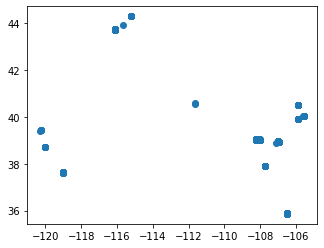

In [15]:
gdf_snow_ex.plot()

In [13]:
gdf_snow_ex.to_file('snowex_site_locations.json')  
gdf_snow_ex.to_file('snowex_site_locations.shp')  

In [17]:
print(gdf_snow_ex)

              site_id   latitude   longitude     site_name  \
0        Forest North  40.033250 -105.553730   Niwot Ridge   
1                7S23  39.017675 -108.171173    Grand Mesa   
2         Skyway Open  39.050930 -108.061300    Grand Mesa   
3    County Line Tree  39.032250 -108.034590    Grand Mesa   
4          Joe Wright  40.524080 -105.893450  Cameron Pass   
..                ...        ...         ...           ...   
525    HQ Met Station  35.857890 -106.521360   Jemez River   
526              1S12  39.018264 -108.191417    Grand Mesa   
527              8S28  39.019427 -108.166172    Grand Mesa   
528         Open Flat  40.035880 -105.552210   Niwot Ridge   
529              3N26  39.033415 -108.184233    Grand Mesa   

                        geometry  
0    POINT (-105.55373 40.03325)  
1    POINT (-108.17117 39.01767)  
2    POINT (-108.06130 39.05093)  
3    POINT (-108.03459 39.03225)  
4    POINT (-105.89345 40.52408)  
..                           ...  
525  POINT